> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:

df = pd.read_csv('NoShowAppointments.csv')

# check general info
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
# check for null values
df.isnull().values.any()

False

In [5]:
# check for duplicates for PatientId
df.PatientId.duplicated().any()

True

In [6]:
# check for duplicates for other columns like AppointmentId
df.AppointmentID.duplicated().any()

False

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# remove duplicates for PatientId
df.drop_duplicates(subset='PatientId', inplace=True)

In [8]:
# verify again if no duplicates
df.PatientId.duplicated().any()

False

In [9]:
# The column name No-Show has a hyphen and not an underscore, which will create problems, so it should be renamed
# The NoShow column has string based no and yes values, easier to convert into 0 and 1 like other columns
# I would also rename SMS_received just to take away the underscore typing
df.rename(columns={"No-show": "Show", "SMS_received": "SMSReceived"}, inplace=True)
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Now replace the values of Show columns to correct numerics
df["Show"].replace({"Yes": "0", "No": "1"}, inplace=True)
df['Show'] = pd.to_numeric(df['Show'])

In [11]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMSReceived,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1



## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Does Gender play a role in No-Show appointments?)

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
dfm = df.query("Gender == 'M'")
dfmg = dfm.groupby(['Gender'])['Show'].value_counts()
dfmg

Gender  Show
M       1       17888
        0        4365
Name: Show, dtype: int64

In [13]:
dff = df.query("Gender == 'F'")
dffg = dff.groupby(['Gender'])['Show'].value_counts()
dffg

Gender  Show
F       1       32218
        0        7828
Name: Show, dtype: int64

Text(0.5, 1.0, 'Male -show/no-show in percentage')

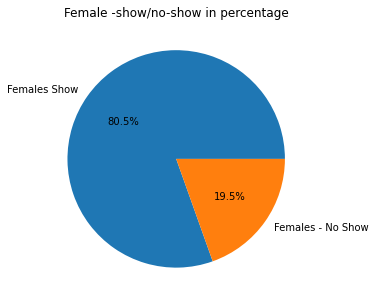

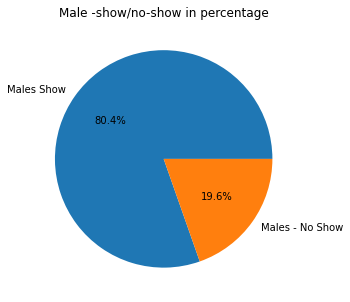

In [14]:

labels = ["Females Show", "Females - No Show"]
plt.figure(figsize=(5,5))
plt.pie(dffg,labels = labels, autopct = '%1.1f%%')
plt.title('Female -show/no-show in percentage')

labels = ["Males Show", "Males - No Show"]
plt.figure(figsize=(5,5))
plt.pie(dfmg,labels = labels, autopct = '%1.1f%%')
plt.title('Male -show/no-show in percentage')

### Research Question 2  (Replace this header name!)

<AxesSubplot:xlabel='SMSReceived'>

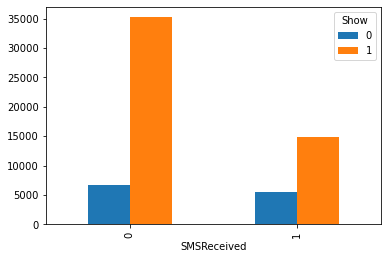

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
dfs = df.groupby(['SMSReceived', 'Show']).size().unstack('Show')
dfs.plot.bar()




In [16]:
dfse = df.query("SMSReceived == 1")['Show'].value_counts(normalize = True)
dfse

1    0.730754
0    0.269246
Name: Show, dtype: float64

In [22]:
new_df = df.groupby('SMSReceived')['Show'].value_counts(normalize=True)
#new_df = new_df.mul(100).rename('Percent')
new_df.unstack('Show')
new_df


SMSReceived  Show
0            1       0.840067
             0       0.159933
1            1       0.730754
             0       0.269246
Name: Show, dtype: float64

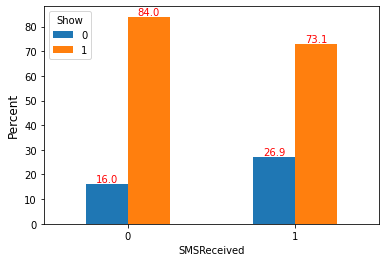

In [34]:
#ax = new_df.plot.bar(x='SMSReceived', y = 'Percent', fontsize=12)
ax = new_df.unstack('Show').mul(100).plot.bar(rot=0)
ax.set_ylabel("Percent", fontsize=12)

bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
           bar.get_height(),
           f'{bar.get_height():.3}',
           ha="center", va="bottom", color="r")
    
plt.show()


In [46]:
# Above graph indicates that rate of showing up or not showing up was less in those who received SMS as compared 
# to those who did not

# Let's explore what are the other factors that directly correlate to showing up..
# we have Handcap as a factor having 0 to 4 values.. Kaggle page describes Handcap as 1 having one disability problem
# 2 meaning having two kinds of disability etc. 0 means no disability

# todo - convert all values handcap to 0 or 1
a = df['Handcap'].unique()
a

array([0, 1, 2, 3, 4])

In [93]:

#dfhandcap = df.query('Handcap != 0').groupby(['Gender'])['Show'].value_counts()
# --- to do convert handcap into 0 or 1 since it does not interest us
#dfhandcap.unstack().plot.bar(rot=0)
#plt.bar(dfhandcap.index, dfhandcap['Gender'])



TypeError: filter function returned a DataFrame, but expected a scalar bool

In [71]:
ax = dfhandcap.unstack('Show').mul(100).plot.bar(rot = 0)
ax.set_ylabel("Percent", fontsize=12)

bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
           bar.get_height(),
           f'{bar.get_height():.3}',
           ha="center", va="bottom", color="r")
    
plt.show()

dfnohandcap = df.query('Handcap == 0').groupby(['Show'])['Gender'].value_counts(normalize=True)
ax = dfnohandcap.unstack('Show').mul(100).plot.bar(rot = 0)

#dfnohandcap
ax.set_ylabel("Percent", fontsize=12)

bars = ax.patches
for bar in bars:
    ax.text(bar.get_x() + bar.get_width()/2., 
           bar.get_height(),
           f'{bar.get_height():.3}',
           ha="center", va="bottom", color="r")
    
plt.show()



KeyError: 'Requested level (Show) does not match index name (None)'

Show  Gender
0     F         0.643077
      M         0.356923
1     F         0.644756
      M         0.355244
Name: Gender, dtype: float64

In [101]:
dfhg = df.groupby(['Alcoholism'])['Show'].value_counts(normalize=True)
dfhg

# todo -- plot handcap, alcoholism, scholorship together in a bar to see the difference

Alcoholism  Show
0           1       0.805126
            0       0.194874
1           1       0.770252
            0       0.229748
Name: Show, dtype: float64

In [178]:
# which neighbourhood received  scholarships
dfs = df.query('Scholarship == 1 & Show == 1').groupby(['Neighbourhood'])['Neighbourhood'].value_counts().nlargest(5)
dfs
           
         

Neighbourhood     Neighbourhood   
TABUAZEIRO        TABUAZEIRO          242
ILHA DO PRÍNCIPE  ILHA DO PRÍNCIPE    208
CARATOÍRA         CARATOÍRA           196
SANTA MARTHA      SANTA MARTHA        196
SÃO BENEDITO      SÃO BENEDITO        191
Name: Neighbourhood, dtype: int64

In [ ]:
# which neighbourhood had most show up rate
dfn = df.query('Show == 1').groupby(['Neighbourhood', 'Scholarship'])['Neighbourhood'].value_counts().nlargest(5)


##df.groupby(['Show'])['Neighbourhood'].value_counts()



#dfn = dfn.mul(100).rename('Percent')
#dfh = dfn.unstack()
#dfn
dfn
#dfn['Show'].nlargest(2)


In [169]:
dfp = df.query('Show == 1').groupby(['Neighbourhood', 'Scholarship'])['Neighbourhood'].value_counts().nsmallest(5)
dfp

Neighbourhood      Scholarship  Neighbourhood    
MATA DA PRAIA      1            MATA DA PRAIA        1
NAZARETH           1            NAZARETH             1
PARQUE INDUSTRIAL  0            PARQUE INDUSTRIAL    1
UNIVERSITÁRIO      1            UNIVERSITÁRIO        1
ENSEADA DO SUÁ     1            ENSEADA DO SUÁ       2
Name: Neighbourhood, dtype: int64

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!